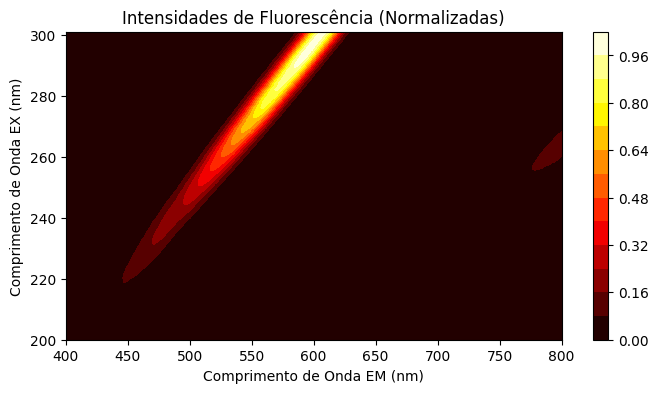

In [8]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'ICNB_S2_D.txt'

data = []
em_wavelengths = []

# Abrir o arquivo e ignorar as linhas até encontrar "EX Wavelength/EM Wavelength"
with open(filename, 'r') as file:
    process_data = False  # Flag para indicar quando começar a processar os dados

    for line in file:
        if line.startswith('"EX Wavelength/EM Wavelength"'):
            # Extrair os comprimentos de onda EM
            em_wavelengths = [float(w) for w in line.strip().split(',')[1:] if w]
            process_data = True  # Ativar a leitura dos dados a partir daqui
            continue  # Ir para a próxima linha

        if process_data:
            values = line.strip().split(',')
            if all(val.replace('.', '', 1).isdigit() for val in values[1:] if val):
                # Adicionar os dados de intensidade como floats
                data.append([float(val) for val in values[1:] if val])

# Converter os dados para array NumPy
data = np.array(data)

# Normalizar os dados
max_intensity = np.max(data)
data_normalized = data / max_intensity

# Gerar os comprimentos de onda de excitação (EX)
ex_wavelengths = np.linspace(200, 301, data.shape[0])

# Plotar gráfico de contorno com dados normalizados
plt.figure(figsize=(8, 4))
levels = 15  # Ajuste para suavizar o degradê
contour = plt.contourf(em_wavelengths, ex_wavelengths, data_normalized, levels=levels, cmap='hot')
plt.colorbar(contour)
plt.title('Intensidades de Fluorescência (Normalizadas)')
plt.xlabel('Comprimento de Onda EM (nm)')
plt.ylabel('Comprimento de Onda EX (nm)')

# Ajustar limites dos eixos
plt.xlim(min(em_wavelengths), max(em_wavelengths))
plt.ylim(200, 301)

# Salvar o gráfico como imagem
plt.savefig('Espectrofluorímetro_Normalizado.png')
plt.show()
